In [23]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [27]:
df = make_classification()
x = df[0]
y = df[1]

In [28]:
scaler = StandardScaler()

In [29]:
scaler.fit(x)
scaler.transform(x)

array([[-0.425357  ,  0.48031032, -2.12989553, ..., -0.01058591,
        -1.24416157, -1.15512677],
       [ 0.86612642,  0.68686275,  0.99504779, ...,  0.21686024,
        -0.23243302, -0.01292817],
       [-0.5712864 , -0.24724746,  0.40473982, ..., -0.01956173,
         1.67653509,  1.52648642],
       ...,
       [ 0.14009781, -0.96273209, -0.01567864, ..., -0.5492302 ,
        -1.11605284,  0.94495825],
       [ 0.8628105 ,  0.30461238, -0.93550629, ..., -0.68486734,
         1.06135101,  0.07378325],
       [-2.08340714, -0.63102602, -0.01479709, ..., -0.92598928,
         0.47837818, -1.89524244]])

In [30]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [126]:
knn = KNeighborsClassifier(n_neighbors=1)

In [127]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [128]:
y_pred = knn.predict(x_test)

In [129]:
from sklearn.metrics import accuracy_score,classification_report

score = accuracy_score(y_pred,y_test)
print("accuracy score is",score)

accuracy score is 0.8333333333333334


In [130]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84        15
           1       0.86      0.80      0.83        15

    accuracy                           0.83        30
   macro avg       0.83      0.83      0.83        30
weighted avg       0.83      0.83      0.83        30



In [112]:
##select k vale with elbow method

from sklearn.model_selection import cross_val_score

accuracy_rate = []
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score = cross_val_score(knn,x,y,cv=10)
    accuracy_rate.append(score.mean())

In [101]:
import matplotlib.pyplot as plt

Text(0.5, 0, 'K')

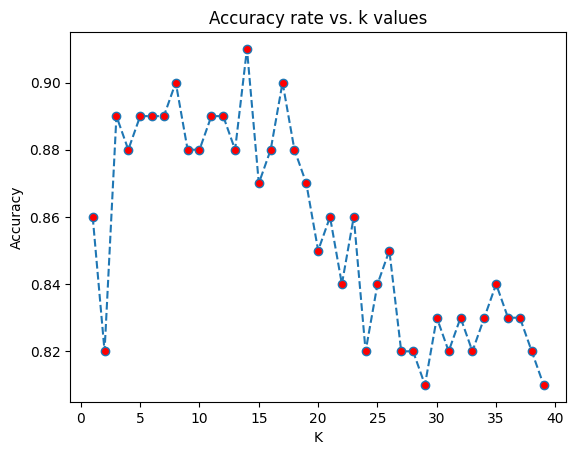

In [123]:
plt.plot(range(1,40),accuracy_rate,ls='--',marker='o',markerfacecolor='red')
plt.title("Accuracy rate vs. k values")
plt.ylabel("Accuracy")
plt.xlabel("K")

In [100]:
# check on testing dataset
error_rate = []
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    score = accuracy_score(pred_i,y_test)
    error_rate.append(1-score)

Text(0.5, 0, 'K')

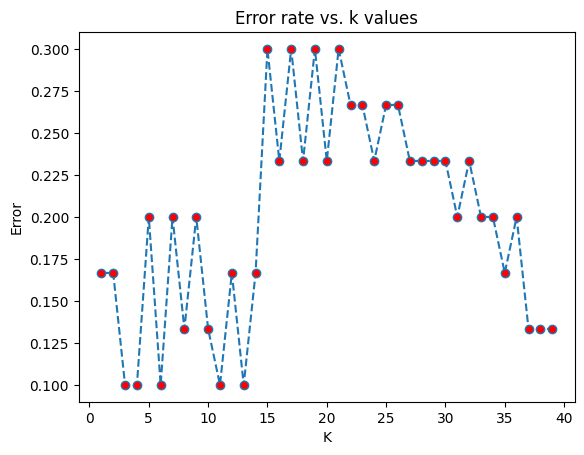

In [125]:
plt.plot(range(1,40),test_rate,ls='--',marker='o',markerfacecolor='red')
plt.title("Error rate vs. k values")
plt.ylabel("Error")
plt.xlabel("K")

here we can see that after k=13 there is no decrease in error rate so its a value good to go. :))

In [132]:
#comparing with initial k value 1
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(x_train,y_train)
accuracy_score(knn.predict(x_test),y_test)

0.9